In [2]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from reg_greedy_search import Greedy_Search
from reg_greedy_base_hGLM import Greedy_Base_hGLM

In [3]:
train_T = 65000
test_T = 15000
T_no = 100

batch_size = 1500
batch_no = 20000

max_sub = 10
cell_type = "CA1"
clust_no = 4
kern_no = 3+1

In [4]:
if cell_type == "L23":
    ## L23 ###
    V_ref = np.load("/media/hdd01/sklee/L23_inputs/vdata_NMDA_ApN0.5_13_Adend_r0_o2_i2_g_b4.npy").flatten()
    V_ref = torch.from_numpy(V_ref)

    E_neural = np.load("/media/hdd01/sklee/L23_inputs/Espikes_NMDA_ApN0.5_13_Adend_r0_o2_i2_g_b4_neural.npy")
    I_neural = np.load("/media/hdd01/sklee/L23_inputs/Ispikes_NMDA_ApN0.5_13_Adend_r0_o2_i2_g_b4_neural.npy")
    E_neural = torch.from_numpy(E_neural)
    I_neural = torch.from_numpy(I_neural)
elif cell_type == "CA1":
    ## CA1 ###
    clust_id = "clust"+str(clust_no)
    V_ref = np.load("/media/hdd01/sklee/CA1_inputs/"+clust_id+"/vdata_T10_Ne2000_gA0.6_tauA1_gN0.8_Ni200_gG0.1_gB0.1_Er0.5_Ir7.4_random_NR_rep16_stimseed1.npy")[:,:10000]
    V_ref = V_ref.flatten()
    V_ref = torch.from_numpy(V_ref)

    E_neural = np.load("/media/hdd01/sklee/CA1_inputs/clust4/Espikes_T10_Ne2000_gA0.6_tauA1_gN0.8_Ni200_gG0.1_gB0.1_Er0.5_Ir7.4_random_NR_neural.npy")
    I_neural = np.load("/media/hdd01/sklee/CA1_inputs/clust4/Ispikes_T10_Ne2000_gA0.6_tauA1_gN0.8_Ni200_gG0.1_gB0.1_Er0.5_Ir7.4_random_NR_neural.npy")
    E_neural = torch.from_numpy(E_neural)
    I_neural = torch.from_numpy(I_neural)
    syn_loc_raw = np.load("/media/hdd01/sklee/CA1_inputs/"+clust_id+"/synlocs_T10_Ne2000_gA0.6_tauA1_gN0.8_Ni200_gG0.1_gB0.1_Er0.5_Ir7.4_random_NR_rep16_stimseed1.npy")
    
    syn_loc_e = torch.zeros((E_neural.shape[1]))
    syn_loc_i = torch.zeros((I_neural.shape[1]))

    for i in range(E_neural.shape[1]):
        dist_e = syn_loc_raw[i,1]
        if dist_e < 1/3:
            syn_loc_e[i] = 1
        elif (dist_e>=1/3) & (dist_e<2/3):
            syn_loc_e[i] = 2
        elif dist_e >= 2/3:
            syn_loc_e[i] = 3

    syn_loc_i[:80] = 0
    for i in range(I_neural.shape[1]-80):
        dist_i = syn_loc_raw[i+E_neural.shape[1]+80,1]
        if dist_i < 1/3+1:
            syn_loc_i[i+80] = 1
        elif (dist_i>=1/3+1) & (dist_i<2/3+1):
            syn_loc_i[i+80] = 2
        elif dist_i >= 2/3+1:
            syn_loc_i[i+80] = 3 

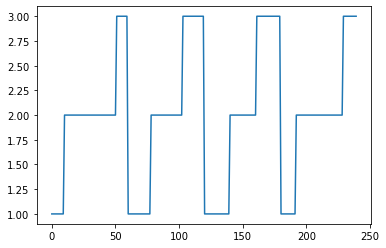

In [4]:
plt.plot(syn_loc_e[1000-120:1000+120])

In [5]:
greedy_search = Greedy_Search(V_ref, train_T, test_T, T_no, E_neural, I_neural,
                batch_size, batch_no, max_sub, cell_type, clust_no, kern_no)

In [6]:
greedy_search.greedy_search(syn_loc_e, syn_loc_i)


FINAL C_DEN_RAW tensor([0])
FINAL_BEST_SCORES tensor([0.7650, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000])



DONE: Sub3-0



DONE: Sub3-1
Sub3_scores tensor([0.8122, 0.8039])
FINAL C_DEN_RAW tensor([0, 0])
FINAL_BEST_SCORES tensor([0.7650, 0.8122, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000])



DONE: Sub4-0



DONE: Sub4-1



DONE: Sub4-2
Sub4_scores tensor([0.8270, 0.8099, 0.8100])
FINAL C_DEN_RAW tensor([0, 0, 0])
FINAL_BEST_SCORES tensor([0.7650, 0.8122, 0.8270, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000])



DONE: Sub5-0



DONE: Sub5-1



DONE: Sub5-2



DONE: Sub5-3
Sub5_scores tensor([0.8328, 0.8380, 0.8376, 0.8249])
FINAL C_DEN_RAW tensor([0, 0, 0, 1])
FINAL_BEST_SCORES tensor([0.7650, 0.8122, 0.8270, 0.8380, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000])



DONE: Sub6-0



DONE: Sub6-1



DONE: Sub6-2



DONE: Sub6-3



DONE: Sub6-4
Sub6_scores tensor([0.8426, 0.8411, 0.8475, 0.8407, 0.8326])
FINAL C_DEN_RAW tensor([0, 0, 0, 1, 2])
FINAL_BEST_SCORES tensor([0.7650, 0.8122, 0.8270, 0.8380, 0.8475, 0.0000, 0.0000, 0.0000, 0.0000])



DONE: Sub7-0



DONE: Sub7-1



DONE: Sub7-2



DONE: Sub7-3



DONE: Sub7-4


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)




DONE: Sub8-3


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)




DONE: Sub8-6
Sub8_scores tensor([0.8405, 0.8457, 0.8410, 0.8497, 0.8584, 0.8515, 0.8368])
FINAL C_DEN_RAW tensor([0, 0, 0, 1, 2, 5, 4])
FINAL_BEST_SCORES tensor([0.7650, 0.8122, 0.8270, 0.8380, 0.8475, 0.8557, 0.8584, 0.0000, 0.0000])


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)




DONE: Sub9-2


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)




DONE: Sub9-6


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)




DONE: Sub10-0


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)




DONE: Sub10-3


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)




DONE: Sub10-6


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



# Analyze Weights 

In [5]:
# L23 #
#C_den_raw = torch.tensor([0, 0, 0, 1, 1, 4, 1, 0, 5])[:-2]

#CA1
C_den_raw = np.load("/media/hdd01/sklee/greedy/clust4/regCDen_CA1_sub10.npy")
C_den_raw = torch.from_numpy(C_den_raw)

def make_C_den(raw):
    sub_no = raw.shape[0] + 1
    C_den = torch.zeros(sub_no, sub_no)
    for i in range(sub_no - 1):
        C_den[raw[i], i+1] = 1
    return C_den
C_den = make_C_den(C_den_raw)

#E_no = 629
#I_no = 120

E_no = 2000
I_no = 200
T_no = 100
kern_no = 3+1


model = Greedy_Base_hGLM(C_den.cuda(), syn_loc_e, syn_loc_i, E_no, I_no, T_no, kern_no)

model.load_state_dict(torch.load("/media/hdd01/sklee/greedy/clust4/reggreedybaseGLM_CA1_sub10-8.pt"))
#model.load_state_dict(torch.load("/media/hdd01/sklee/greedy/greedybaseGLM_L23_sub8-1.pt"))

<All keys matched successfully>

In [6]:
e_raw = model.C_syn_e_logit
e_clean = torch.zeros_like(e_raw)

for i in range(e_raw.shape[1]):
    idx = torch.argmax(e_raw[:,i])
    e_clean[idx,i] = 1
    
i_raw = model.C_syn_i_logit
i_clean = torch.zeros_like(i_raw)

for i in range(i_raw.shape[1]):
    idx = torch.argmax(i_raw[:,i])
    i_clean[idx,i] = 1
    

In [7]:
e_plot = torch.zeros(e_clean.shape[1])
for i in range(e_clean.shape[1]):
    e_plot[i] = torch.where(e_clean[:,i] == 1)[0]
    
i_plot = torch.zeros(i_clean.shape[1])
for i in range(i_clean.shape[1]):
    i_plot[i] = torch.where(i_clean[:,i] == 1)[0]

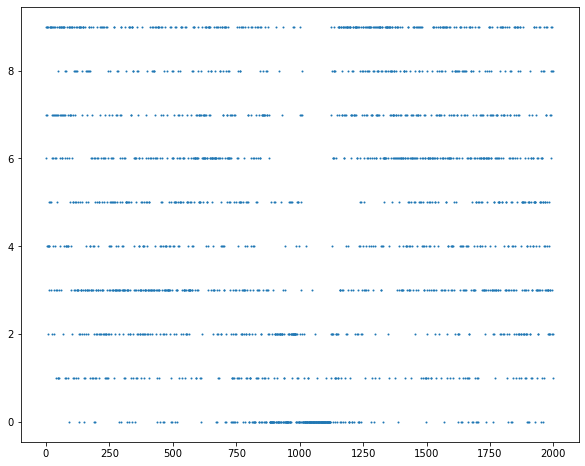

In [8]:
plt.figure(figsize = (10,8))
#plt.scatter(torch.arange(240), e_plot[1000-120:1000+120], s=1)
plt.scatter(torch.arange(E_no), e_plot, s=1)
#plt.scatter(torch.arange(I_no), i_plot,s=0.5)

In [39]:
locs = np.load("/media/hdd01/sklee/CA1_inputs/synlocs_T10_Ne2000_gA0.6_tauA1_gN0.8_Ni200_gG0.1_gB0.1_Er0.5_Ir7.4_random_NR_rep16_stimseed1.npy")
e_locs = locs[:2000]
i_locs = locs[2000:]

In [42]:
print(np.unique(e_locs[1000-120:1000+120,0]))

[ 8. 13. 36. 59.]
